<a href="https://colab.research.google.com/github/FauzanNR/rock-paper-scissor-machine-learning-dicoding/blob/main/rockpapercissorV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAMA: FAUZAN NUR RIFAI

EMAIL: fauzannur.fnr@gmail.com

ALAMAT : KUTAI KARTANEGARA

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import PIL
import tensorflow as tf
import pathlib
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
%rm -r '/content/rockpaperscissors'and '/content/__MACOSX'
%ls

rm: cannot remove '/content/rockpaperscissorsand': No such file or directory
drive/  rockpaperscissors/  sample_data/  test/


In [3]:
import zipfile
local_zip = '/content/drive/MyDrive/DataFauzan/PythonML/rockpapercissors/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

In [4]:

path = '/content/rockpaperscissors' 
data_dir = pathlib.Path(path)
# ['paper','rock','scissors']
# classes = os.listdir(data_dir)[2:]
classes = ['rock','paper','scissors']

In [5]:
batch_size = 32
image_size = 128

train_data_generator = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=90,
                    horizontal_flip=True,
                    vertical_flip=True,
                    shear_range = 0.2,
                    validation_split = 0.4,
                    fill_mode = 'nearest'
                    )

test_data_generator = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=90,
                    horizontal_flip=True,
                    vertical_flip=True,
                    shear_range = 0.2,
                    validation_split = 0.4,
                    fill_mode = 'nearest'
                    )

In [6]:
train_data = train_data_generator.flow_from_directory(
    data_dir,
    target_size=(image_size, image_size),
    batch_size = batch_size,
    class_mode = 'categorical',
    classes = classes,
    subset = 'training',
    shuffle=True
)
val_data = test_data_generator.flow_from_directory(
    data_dir,
    target_size=(image_size,image_size),
    batch_size=batch_size,
    class_mode= 'categorical',
    classes=classes,
    subset='validation',
    shuffle=False
)


Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [7]:

AUTOTUNE = tf.data.experimental.AUTOTUNE

def prepare(ds, shuffle=False):
  if shuffle:
    ds = ds.shuffle(1000)
  return ds.prefetch(buffer_size=AUTOTUNE)

  train_data = prepare(train_data, True)
  val_data = prepare(val_data)

In [47]:
imgs, labels = val_data.next()

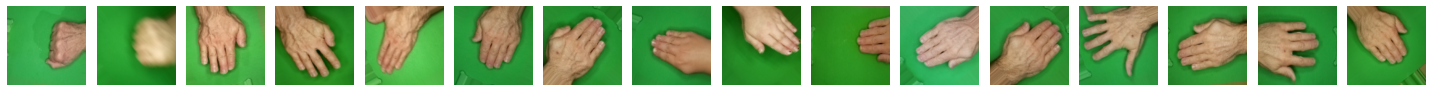

In [48]:

def plotImage(imgs_arr):
  fig, axes = plt.subplots(1,16,figsize=(20,20))
  axes = axes.flatten()
  for img, ax in zip(imgs_arr, axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()
plotImage(imgs)
# print(labels)

In [25]:
model = Sequential([
             layers.Conv2D(16,kernel_size=(3,3),padding='same', activation='relu', input_shape=(image_size,image_size,3)),
             layers.MaxPool2D(),
             layers.Conv2D(32,kernel_size=(3,3), padding='same', activation='relu'),
             layers.MaxPool2D(),
             layers.Conv2D(64,kernel_size=(3,3), padding='same', activation='relu'),
             layers.MaxPool2D(),
             layers.Dropout(0.3),
             layers.Flatten(),
             layers.Dense(256, activation='relu'),
             layers.Dense(512, activation='relu'),
             layers.Dropout(0.2),
             layers.Dense(3, activation='softmax')
])

In [26]:
model.compile(
    optimizer= keras.optimizers.Adam(0.001),
    loss = 'categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 128, 128, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 64, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)       

In [12]:
earlystop = keras.callbacks.EarlyStopping(
    min_delta = 0.001,
    patience = 5,
    monitor='val_accuracy',
    restore_best_weights = True,
    verbose=1
)

In [27]:
model_history = model.fit(
    train_data, 
    validation_data = val_data,
    epochs=60,
    callbacks=[earlystop]
)

Epoch 1/60
42/42 [==============================] - 11s 257ms/step - loss: 1.0900 - accuracy: 0.4102 - val_loss: 0.9908 - val_accuracy: 0.4920
Epoch 2/60
42/42 [==============================] - 10s 250ms/step - loss: 0.9957 - accuracy: 0.4970 - val_loss: 0.8470 - val_accuracy: 0.6522
Epoch 3/60
42/42 [==============================] - 10s 249ms/step - loss: 0.7011 - accuracy: 0.7169 - val_loss: 0.5680 - val_accuracy: 0.7975
Epoch 4/60
42/42 [==============================] - 10s 252ms/step - loss: 0.5377 - accuracy: 0.7702 - val_loss: 0.4449 - val_accuracy: 0.8284
Epoch 5/60
42/42 [==============================] - 10s 249ms/step - loss: 0.4624 - accuracy: 0.8059 - val_loss: 0.3709 - val_accuracy: 0.8501
Epoch 6/60
42/42 [==============================] - 10s 250ms/step - loss: 0.4478 - accuracy: 0.8090 - val_loss: 0.4957 - val_accuracy: 0.8021
Epoch 7/60
42/42 [==============================] - 10s 251ms/step - loss: 0.4058 - accuracy: 0.8402 - val_loss: 0.3337 - val_accuracy: 0.8707

33


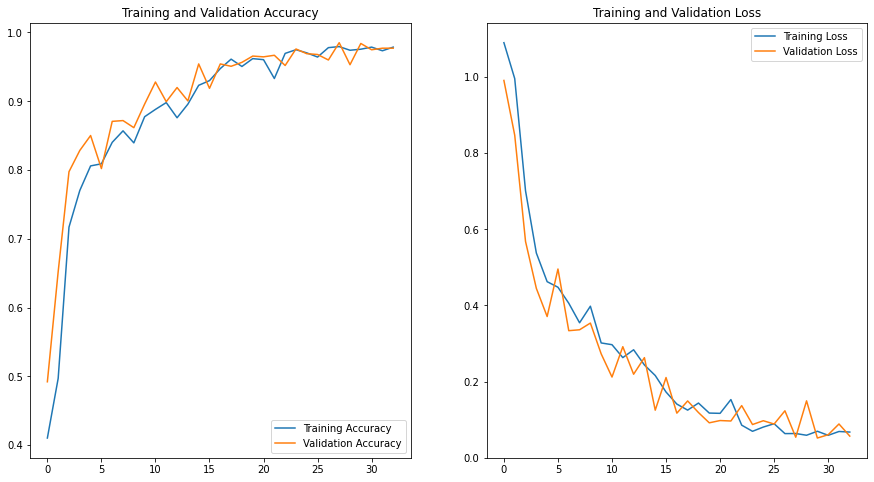

In [28]:
epochs = len(model_history.epoch)
print(epochs)
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']

loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# history_df = pd.DataFrame(history.history)
# history_df.loc[:, ['loss', 'val_loss']].plot();
# print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

In [15]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename, quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
%mkdir 'test'

<IPython.core.display.Javascript object>

Saved to test/photo85.jpg
merupakan scissors dengan kecocokan 57.61%


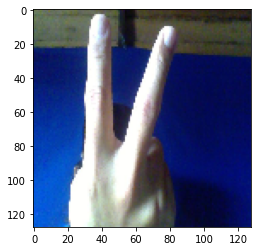

In [30]:
from IPython.display import Image
from google.colab import files
import random

i = random.randint(1,100)

filename ='test/photo{}.jpg'.format(i)

try:
  # filename = '/content/rockpaperscissors/scissors/0657zSfiTYzP2jrl.png'
  filename = take_photo(filename) #for webcam

  # filename = files.upload().keys() #choose local pict
  # for fn in filename:              #choose local        
  #   filename =fn                   #choose local        

  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  imgpred = keras.preprocessing.image.load_img(filename, target_size=(image_size,image_size))
  imgarray = keras.preprocessing.image.img_to_array(imgpred)
  imgarray = tf.expand_dims(imgarray, 0)
  predscore = model.predict(imgarray)
  score = tf.nn.softmax(predscore[0])
  print(
    "merupakan {} dengan kecocokan {:.2f}%"
    .format(classes[np.argmax(score)], np.max(score)*100)
  )
  plt.imshow(imgpred)
except Exception as err:
  print(str(err))